## Global Tsunamis 1900-2023

This Project will look at the NOAA data for Tsunamis. This [link](https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/event-data?maxYear=2023&minYear=1900) will bring you to the origional data. <br>
Citation: [doi:10.7289/V5PN93H7](doi:10.7289/V5PN93H7)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)

In [3]:
tsunami = pd.read_csv('tsunamis-2023-11-11_17-43-29_-0400.tsv', delimiter='\t')

In [5]:
tsunami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                1453 non-null   float64
 2   Mo                                  1440 non-null   float64
 3   Dy                                  1418 non-null   float64
 4   Hr                                  1140 non-null   float64
 5   Mn                                  1127 non-null   float64
 6   Sec                                 969 non-null    float64
 7   Tsunami Event Validity              1453 non-null   float64
 8   Tsunami Cause Code                  1453 non-null   float64
 9   Earthquake Magnitude                1064 non-null   float64
 10  Vol                                 92 non-null     float64
 11  More Info                           0 non-n

In [5]:
tsunami.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Vol,More Info,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Magnitude (Abe),Tsunami Magnitude (Iida),Tsunami Intensity,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""1900 <= Year >= 2023""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1900.0,1.0,10.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0.0,INDONESIA,"GALELA, HALMAHERA ISLAND",1.82,127.85,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1900.0,1.0,20.0,6.0,33.0,30.0,3.0,1.0,7.3,NaN,NaN,0.0,MEXICO,MEXICO,20.00,-105.00,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
3,NaN,1900.0,5.0,16.0,20.0,12.0,NaN,3.0,1.0,6.9,NaN,NaN,0.0,MEXICO,MEXICO,20.00,-105.00,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,1900.0,8.0,11.0,4.0,40.0,NaN,4.0,3.0,NaN,NaN,NaN,0.0,USA,"LITUYA BAY, AK",58.60,-137.50,NaN,1.0,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


___
Time to clean some of the data

First drop the first row and then some usless columns. search parameters, Hr, Mn, Sec columns are not going to be used so they will be dropped. The Vol and More Info columns are links to more info about the event so they are going to be dropped

In [7]:
tsunami.drop(0,inplace= True)
drop_columns = ['Search Parameters','Hr','Mn','Sec','Vol','More Info','Deposits']
tsunami.drop(drop_columns, axis = 1, inplace = True)

Next make the year, month, day, event validity, cause code, and number of runups columns into int values.

In [8]:
column = ['Year', 'Mo', 'Dy', 'Tsunami Event Validity', 'Tsunami Cause Code','Number of Runups']
for col in column:
    tsunami[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    tsunami[col].fillna(-1000, inplace=True)
    tsunami[col] = tsunami[col].astype(int)
    tsunami[col].replace(-1000, np.nan, inplace=True)

Earthquake magnatude should be greater than 3.5. Earthquakes less then 3.5 will not be felt so will not cause a tsunami. 

In [43]:
tsunami['Earthquake Magnitude'].describe()

count    1064.000000
mean        7.013346
std         0.769889
min         3.700000
25%         6.600000
50%         7.100000
75%         7.600000
max         9.500000
Name: Earthquake Magnitude, dtype: float64

Next check the latitude and longitude columns to make sure the values make sense.latitude goes from -90 to 90 and longitude from -180 to 180

In [10]:
tsunami['Latitude'].describe()

count    1359.000000
mean       14.384619
std        28.917103
min       -63.000000
25%        -8.328500
50%        16.325000
75%        38.709000
max        78.370000
Name: Latitude, dtype: float64

In [11]:
tsunami['Longitude'].describe()

count    1359.000000
mean       40.675884
std       114.169556
min      -179.971000
25%       -71.691000
50%        98.524000
75%       142.058000
max       179.984000
Name: Longitude, dtype: float64

latitude and longitude are withen acceptable values

____
Taking a look at the event validity column.<br>
the validity codes are the following:<br>
<br>
-1 ->	erroneous entry<br>
0 ->	event that only caused a seiche or disturbance in an inland river/lake<br>
1 ->	very doubtful tsunami<br>
2 ->	questionable tsunami<br>
3 ->	probable tsunami<br>
4 ->	definite tsunami<br>

In [45]:
tsunami['Tsunami Event Validity'].value_counts().sort_index()

-1     51
 0     81
 1    178
 2    199
 3    198
 4    746
Name: Tsunami Event Validity, dtype: int64

____
Time to take a look at the cause code column.<br>
The Cause codes are the folloing:<br>
<br>
0 ->	Unknown<br>
1 ->	Earthquake<br>
2 ->	Questionable Earthquake<br>
3 ->	Earthquake and Landslide<br>
4 ->	Volcano and Earthquake<br>
5 ->	Volcano, Earthquake, and Landslide<br>
6 ->	Volcano<br>
7 ->	Volcano and Landslide<br>
8 ->	Landslide<br>
9 ->	Meteorological<br>
10 ->	Explosion<br>
11 ->	Astronomical Tide<br>

In [15]:
tsunami['Tsunami Cause Code'].value_counts().sort_index()

0       75
1     1049
2        8
3       71
4        5
5        1
6       67
7       10
8       95
9       70
10       2
Name: Tsunami Cause Code, dtype: int64

___
The amount of non earthquake caused tsunami events

In [46]:
tsunami[tsunami['Tsunami Cause Code'] != 1].shape[0]

404

The Total countries affected

In [98]:
tsunami['Country'].nunique()

95

A list of all of the countries affected

In [99]:
tsunami['Country'].unique()

array(['INDONESIA', 'MEXICO', 'USA', 'PAPUA NEW GUINEA', 'VENEZUELA',
       'BULGARIA', 'JAPAN', 'NEW CALEDONIA', 'PHILIPPINES', 'NICARAGUA',
       'GUATEMALA', 'EL SALVADOR', 'MARTINIQUE (FRENCH TERRITORY)',
       'SAINT VINCENT AND THE GRENADINES', 'GREECE', 'USA TERRITORY',
       'ITALY', 'TAIWAN', 'CHILE', 'CANADA', 'COLOMBIA', 'RUSSIA',
       'NEW ZEALAND', 'PANAMA', 'COOK ISLANDS', 'NORWAY', 'COSTA RICA',
       'VANUATU', 'INDIA', 'SAMOA', 'GEORGIA', 'TUNISIA', 'TOGO',
       'ECUADOR', 'MARSHALL ISLANDS, REP. OF', 'GHANA', 'PERU', 'JAMAICA',
       'TONGA', 'UKRAINE', 'ALBANIA', 'TRINIDAD AND TOBAGO', 'TURKEY',
       'MICRONESIA, FED. STATES OF', 'DOMINICAN REPUBLIC', 'CHINA',
       'FRENCH POLYNESIA', 'ICELAND', 'AUSTRALIA', 'KOREA', 'VIETNAM',
       'SOLOMON ISLANDS', 'UK', 'SOUTH KOREA', 'PORTUGAL', 'ISRAEL',
       'SPAIN', 'MYANMAR (BURMA)', 'KENYA', 'CUBA', 'NEPAL', 'PAKISTAN',
       'NAURU', 'CONGO', 'GRENADA', 'CYPRUS', 'ATLANTIC OCEAN',
       'GREENLAND', 'FI

____
Time to filter the data to only look at probable and definate tsunami events for when the cause is earthquakes

In [17]:
pro_tsu = tsunami[(tsunami['Tsunami Event Validity'] >= 3) & (tsunami['Tsunami Cause Code'] == 1)]

In [18]:
pro_tsu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 2 to 1452
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                745 non-null    int32  
 1   Mo                                  745 non-null    float64
 2   Dy                                  745 non-null    float64
 3   Tsunami Event Validity              745 non-null    int32  
 4   Tsunami Cause Code                  745 non-null    int32  
 5   Earthquake Magnitude                739 non-null    float64
 6   Country                             745 non-null    object 
 7   Location Name                       745 non-null    object 
 8   Latitude                            745 non-null    float64
 9   Longitude                           745 non-null    float64
 10  Maximum Water Height (m)            646 non-null    float64
 11  Number of Runups                    745 non-

A quick look at the countries and how many tsunamis hit them

In [19]:
pro_tsu['Country'].value_counts()

JAPAN                                   156
INDONESIA                                63
RUSSIA                                   61
USA                                      40
SOLOMON ISLANDS                          38
CHILE                                    38
PAPUA NEW GUINEA                         37
MEXICO                                   33
PHILIPPINES                              31
NEW ZEALAND                              24
GREECE                                   24
VANUATU                                  20
NEW CALEDONIA                            19
TAIWAN                                   15
COSTA RICA                               10
PERU                                     10
TONGA                                     9
TURKEY                                    8
USA TERRITORY                             7
ITALY                                     7
SAMOA                                     7
ECUADOR                                   5
VENEZUELA                       

Making a data frame to plot countries affected vs the number of tsunamis they have had

In [20]:
data = pro_tsu['Country'].value_counts()
agg_data = data.to_frame()
agg_data.reset_index(inplace = True) 
agg_data.rename(columns={'index':'country','Country':'num_tsunami'},inplace = True)
agg_data = agg_data.sort_values('num_tsunami',ascending= False).reset_index()
agg_data.drop(columns = 'index', axis = 1, inplace = True)

In [21]:
agg_data.head(10)

,country,num_tsunami
0,JAPAN,156
1,INDONESIA,63
2,RUSSIA,61
3,USA,40
4,SOLOMON ISLANDS,38
5,CHILE,38
6,PAPUA NEW GUINEA,37
7,MEXICO,33
8,PHILIPPINES,31
9,NEW ZEALAND,24


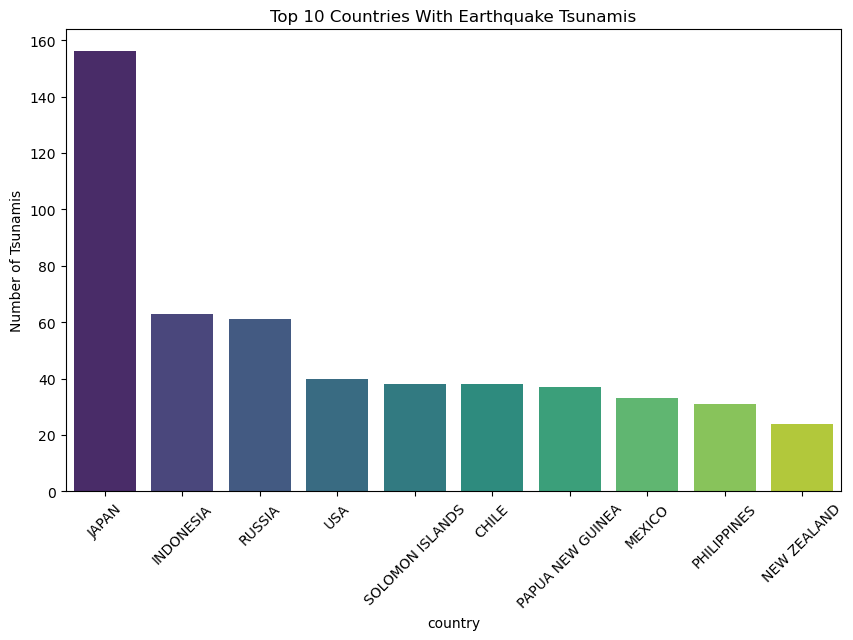

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country',y='num_tsunami',data = agg_data.head(10), palette = 'viridis')
plt.xticks(rotation=45, ha='center')
plt.ylabel("Number of Tsunamis")
plt.title('Top 10 Countries With Earthquake Tsunamis')
plt.show()

Making a Data Frame to help plot the amount of earthquake tsunamis happen a year

In [34]:
data = pro_tsu['Year'].value_counts()
agg_data1 = data.to_frame()
agg_data1.reset_index(inplace = True)
agg_data1.rename(columns={'index':'year','Year':'num_tsunami'},inplace = True)
agg_data1 = agg_data1.sort_values('year').reset_index()
agg_data1.drop(columns = 'index', axis = 1, inplace = True)

In [35]:
agg_data1

,year,num_tsunami
0,1900,6
1,1901,8
2,1902,2
3,1903,1
4,1904,2
...,...,...
117,2019,4
118,2020,10
119,2021,13
120,2022,9


Plotting the amount of earthquake tsunamis per year

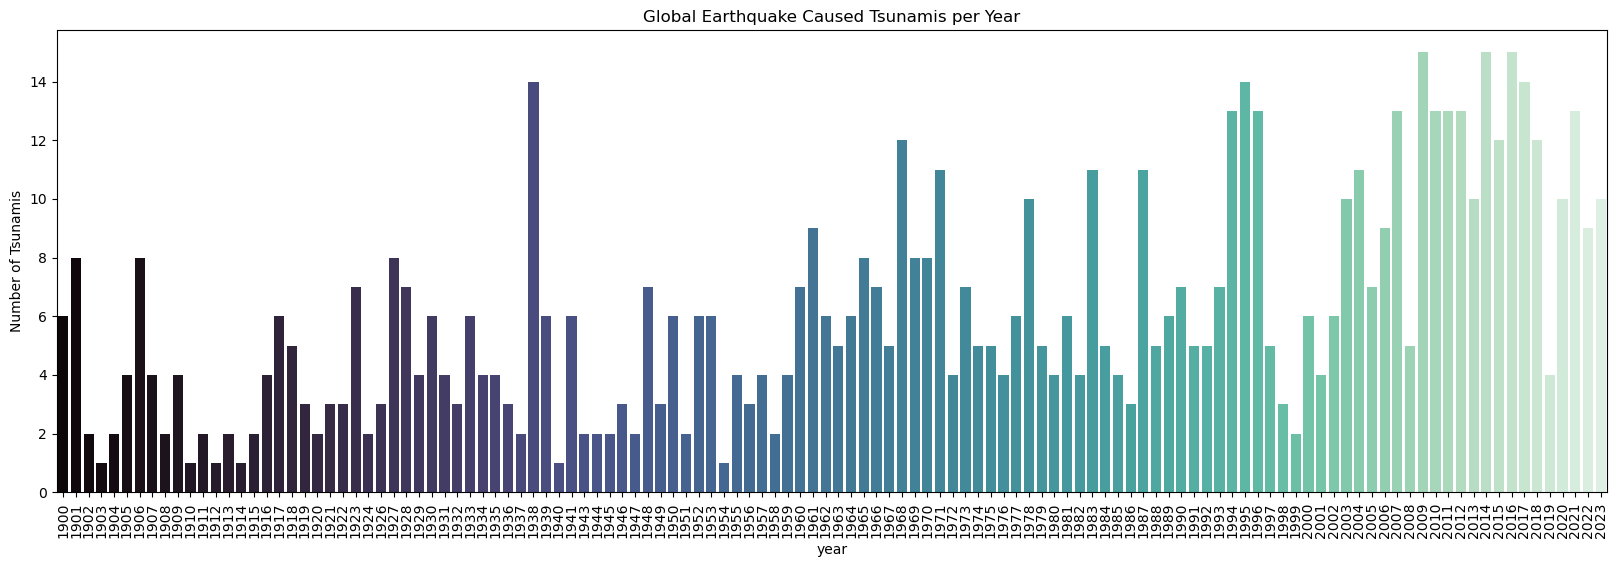

In [53]:
plt.figure(figsize=(20, 6))
sns.barplot(x='year',y='num_tsunami',data = agg_data1, palette = 'mako' )
plt.xticks(rotation=90, ha='center')
plt.ylabel("Number of Tsunamis")
plt.title('Global Earthquake Caused Tsunamis per Year')
plt.show()

In [ ]:
#@todo look at top 3 countries
#find yearly breakdown

____
Time to filter the data to only look at probable and definate tsunami events for when the cause is not earthquakes

In [ ]:
non_earth = tsunami[(tsunami['Tsunami Event Validity'] >= 3) & (tsunami['Tsunami Cause Code'] != 1)]

In [26]:
non_earth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 4 to 1453
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                199 non-null    int32  
 1   Mo                                  196 non-null    float64
 2   Dy                                  193 non-null    float64
 3   Tsunami Event Validity              199 non-null    int32  
 4   Tsunami Cause Code                  199 non-null    int32  
 5   Earthquake Magnitude                59 non-null     float64
 6   Country                             199 non-null    object 
 7   Location Name                       199 non-null    object 
 8   Latitude                            179 non-null    float64
 9   Longitude                           179 non-null    float64
 10  Maximum Water Height (m)            165 non-null    float64
 11  Number of Runups                    199 non-

In [96]:
non_earth['Country'].value_counts().head(10)

USA                 33
NORWAY              16
ITALY               12
JAPAN               12
CANADA              11
PAPUA NEW GUINEA    11
INDONESIA           10
GREECE              10
NEW ZEALAND          6
RUSSIA               6
Name: Country, dtype: int64

In [60]:
data = non_earth['Country'].value_counts()
agg_data2 = data.to_frame()
agg_data2.reset_index(inplace = True) 
agg_data2.rename(columns={'index':'country','Country':'num_tsunami'},inplace = True)
agg_data2 = agg_data2.sort_values('num_tsunami',ascending= False).reset_index()
agg_data2.drop(columns = 'index', axis = 1, inplace = True)

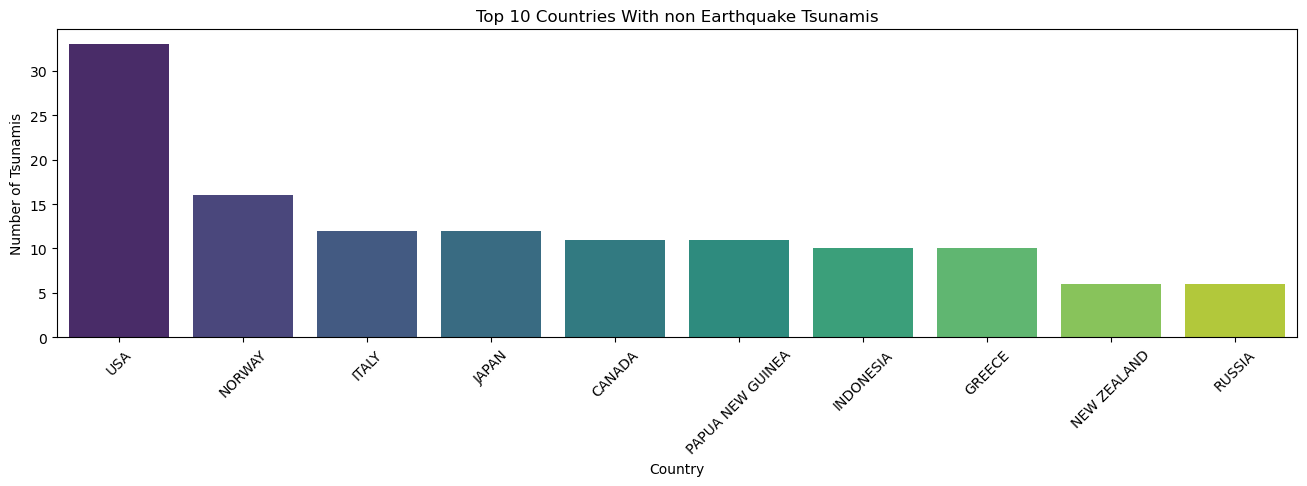

In [69]:
plt.figure(figsize=(16,4))
sns.barplot(data=agg_data2.head(10), x='country',y='num_tsunami',palette = 'viridis')
plt.xticks(rotation=45, ha='center')
plt.xlabel('Country')
plt.ylabel("Number of Tsunamis")
plt.title('Top 10 Countries With non Earthquake Tsunamis')
plt.show()

In [88]:
data=non_earth['Year']
agg_vals = data.value_counts()
agg_vals = agg_vals.to_frame()
agg_vals.reset_index(inplace = True)
agg_vals.rename(columns = {'index':'year','Year':'num_tsu'}, inplace = True)
agg_vals = agg_vals.sort_values('year', ascending = False).reset_index()
agg_vals.drop('index',axis = 1, inplace = True)

In [89]:
agg_vals

,year,num_tsu
0,2023,1
1,2022,5
2,2021,1
3,2020,3
4,2019,3
...,...,...
90,1905,2
91,1903,2
92,1902,3
93,1901,1


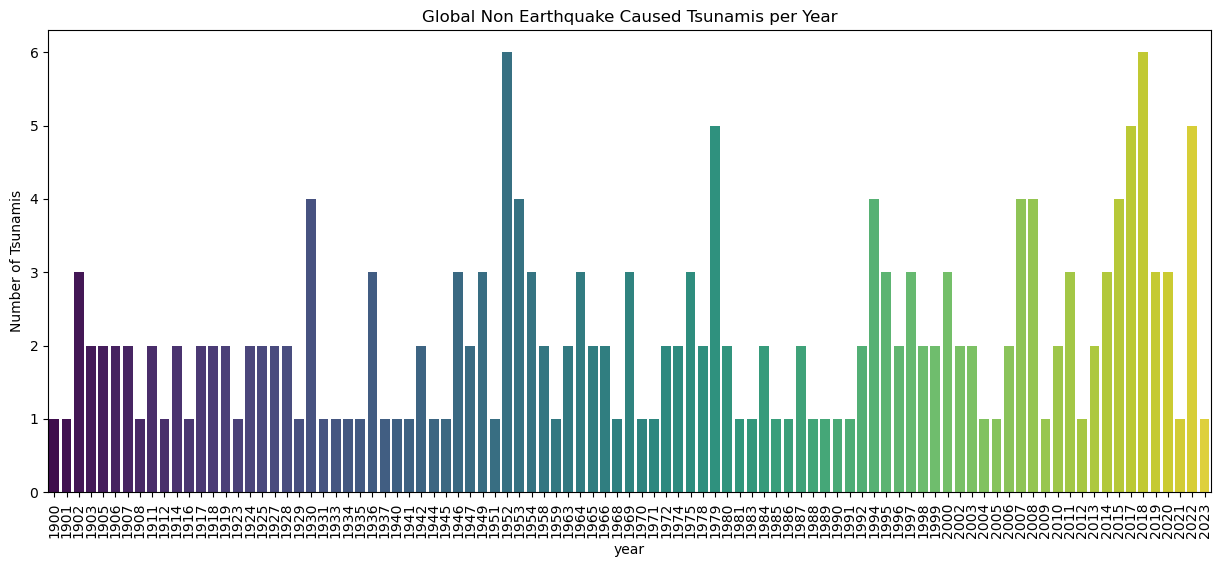

In [97]:
plt.figure(figsize=(15,6))
sns.barplot(data=agg_vals,x='year',y='num_tsu',palette = 'viridis')
plt.xticks(rotation=90, ha='center')
plt.ylabel("Number of Tsunamis")
plt.title('Global Non Earthquake Caused Tsunamis per Year')
plt.show()

@todo: Look thourgh the list of unique countries there are some weird outliers
like Ukraine, Switzerland, and Georgia